In [49]:
import psycopg2.extras
import pytz
from configparser import ConfigParser
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import mpld3

In [50]:
#sign into database


In [51]:
#log_area dataframe 
def log_area_df(case,month_num):
    with conn.cursor() as cursor:
        print('PostgreSQL database version:')
        cursor.execute('SELECT version()')
        # display the PostgreSQL database server version
        db_version = cursor.fetchone()
        print(db_version)
        #executes the sql query (2 situation, case 1 -> exact month, else all months before x
        if case == 1:
            cursor.execute ("select log_area, count(*) as log_area_count from chp_incident Where log_type not like %s and coordinates != '(0,0)' and extract('month' from log_time) = %s Group by log_area Order by log_area_count desc",('%Advisory%',month_num))
        else:
            cursor.execute ("select log_area, count(*) as log_area_count from chp_incident Where log_type not like %s and coordinates != '(0,0)' and extract('month' from log_time) < %s Group by log_area Order by log_area_count desc",('%Advisory%',month_num))
        #fetches the query
        log_area_list = cursor.fetchall()

        #put list into a df 
        log_area_list = pd.DataFrame(log_area_list, columns = ['log_area','log_area_count'])                  
        df_log_area  = log_area_list
        return df_log_area

#creating single bar graph
def single_bar(df,title):
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'center')
     
    if __name__ == '__main__':
       
        # creating data on which bar chart will be plot
        x4 = df.log_area.head(10)
        y4 = df.log_area_count.head(10)
         
        # setting figure size by using figure() function 
        plt.figure(figsize = (18, 10))
         
        # making the bar chart on the data
        plt.bar(x4, y4, color ='pink')
         
        # calling the function to add value labels
        addlabels(x4, y4)
         
        # giving title to the plot
        plt.title(title)
    
        # giving X and Y labels
        plt.xlabel("Reported Areas")
        plt.ylabel("Frequency")
    
        #saves the figure  
        bar_fig4 = plt.gcf()
        bar_fig4.savefig('Top 10 Highest Incident Areas from January to June 2024.png', dpi=100)
        
        # visualizing the plot
        plt.show()


In [52]:
def top_10_month(df,month):
    head = df.log_area.head(10)
    count = df.log_area_count.head(10)
    month_df = np.full(10,month)
    return head, count, month_df

In [53]:
jan_head,jan_count,jan_month = top_10_month(log_area_df(1,1),"January")
feb_head,feb_count,feb_month = top_10_month(log_area_df(1,2),"February")
mar_head,mar_count,mar_month = top_10_month(log_area_df(1,3),"March")
apr_head,apr_count,apr_month = top_10_month(log_area_df(1,4),"April")
may_head,may_count,may_month = top_10_month(log_area_df(1,5),"May")
jun_head,jun_count,jun_month = top_10_month(log_area_df(1,6),"June")

PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)
PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)
PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)
PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)
PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)
PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)


In [54]:
top_10_df = pd.DataFrame({
    "Log Area": np.concatenate((jan_head,feb_head,mar_head,apr_head,may_head,jun_head)),
    "Count": np.concatenate((jan_count,feb_count,mar_count,apr_count,may_count,jun_count)),
    "Month": np.concatenate((jan_month,feb_month,mar_month,apr_month,may_month,jun_month))
})
           

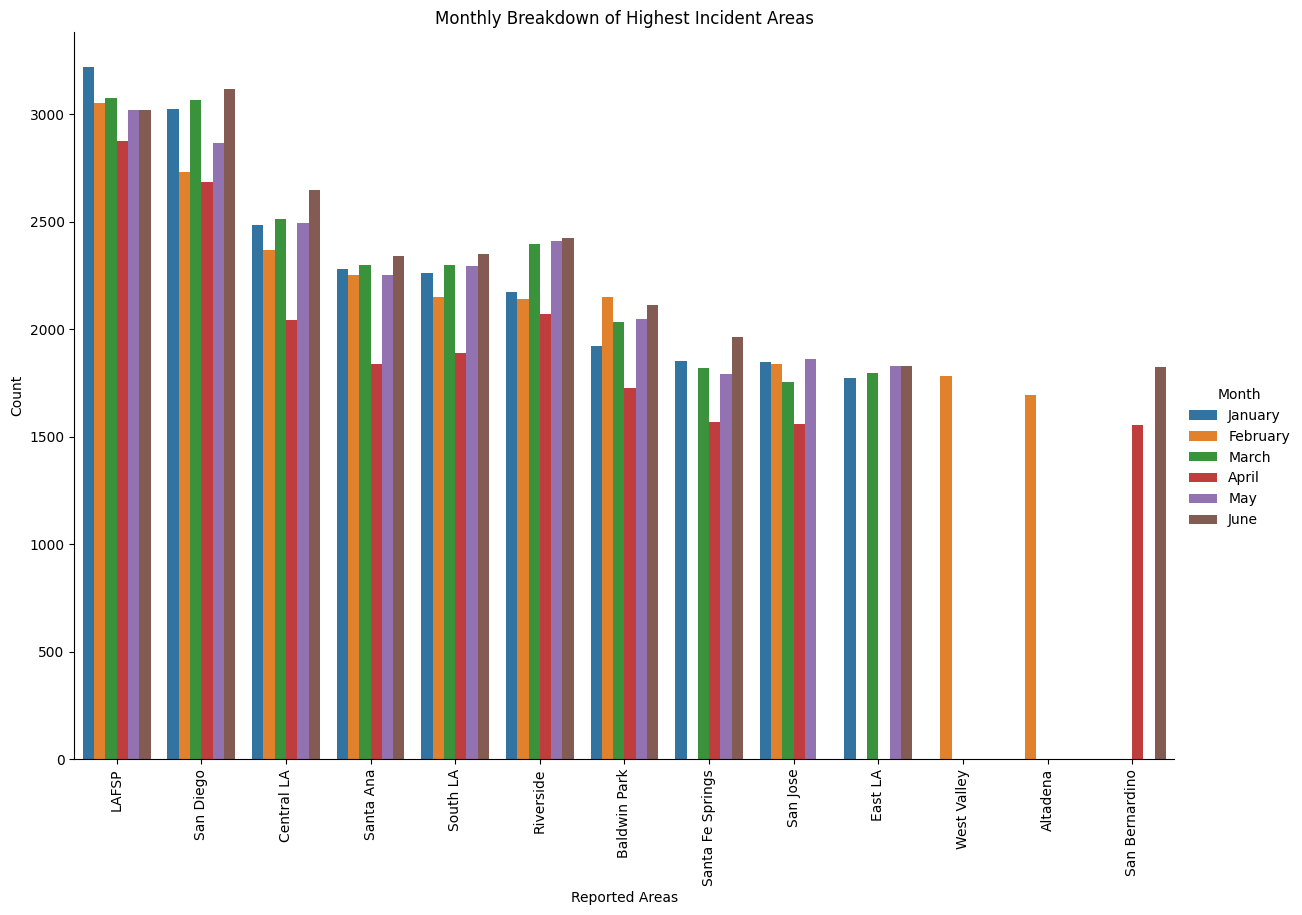

In [55]:
# Draw a grouped barplot

# Set the size of the plot


g = sns.catplot(
    data = top_10_df, 
    kind="bar",
    x="Log Area", 
    y="Count", 
    hue="Month",
    height=8,  # Height in inches
    aspect=1.5  # Aspect ratio, width = height * aspect

)



# Rotate x-axis labels
plt.xticks(rotation=90)

# Adjust font size
plt.xticks(fontsize=10)


plt.title("Monthly Breakdown of Highest Incident Areas")
g.set_axis_labels("Reported Areas", "Count")


# Save the combined plot
plt.savefig('grouped_bar_plot.png', bbox_inches='tight')


In [56]:
with conn.cursor() as cursor:
        print('PostgreSQL database version:')
        cursor.execute('SELECT version()')
        # display the PostgreSQL database server version
        db_version = cursor.fetchone()
        cursor.execute("select log_area , count(*) as log_area_count, extract(month from log_time) as month_2024 from chp_incident where log_area is not null and log_type not like '%Advisory%' and coordinates != '(0,0)' and extract(year from log_time) = 2024 and extract(month from log_time) < 7 and log_area in('LAFSP', 'San Diego','Central LA', 'Riverside', 'Santa Ana', 'South LA', 'Baldwin Park', 'Santa Fe Springs', 'San Jose', 'East LA' ) group by month_2024,log_area order by month_2024 asc")
        list = cursor.fetchall()

df = pd.DataFrame(list, columns = ['Incident Area','Count','Month of 2024'])  
df

PostgreSQL database version:


,Incident Area,Count,Month of 2024
0,Baldwin Park,1920,1
1,Central LA,2485,1
2,East LA,1771,1
3,LAFSP,3220,1
4,Riverside,2174,1
5,San Diego,3022,1
6,San Jose,1849,1
7,Santa Ana,2279,1
8,Santa Fe Springs,1850,1
9,South LA,2263,1


In [57]:
#replacing numeric months with names
df.loc[df["Month of 2024"] == 1, "Month of 2024"] = "January"
df.loc[df["Month of 2024"] == 2, "Month of 2024"] = "February"
df.loc[df["Month of 2024"] == 3, "Month of 2024"] = "March"
df.loc[df["Month of 2024"] == 4, "Month of 2024"] = "April"
df.loc[df["Month of 2024"] == 5, "Month of 2024"] = "May"
df.loc[df["Month of 2024"] == 6, "Month of 2024"] = "June"
df

,Incident Area,Count,Month of 2024
0,Baldwin Park,1920,January
1,Central LA,2485,January
2,East LA,1771,January
3,LAFSP,3220,January
4,Riverside,2174,January
5,San Diego,3022,January
6,San Jose,1849,January
7,Santa Ana,2279,January
8,Santa Fe Springs,1850,January
9,South LA,2263,January


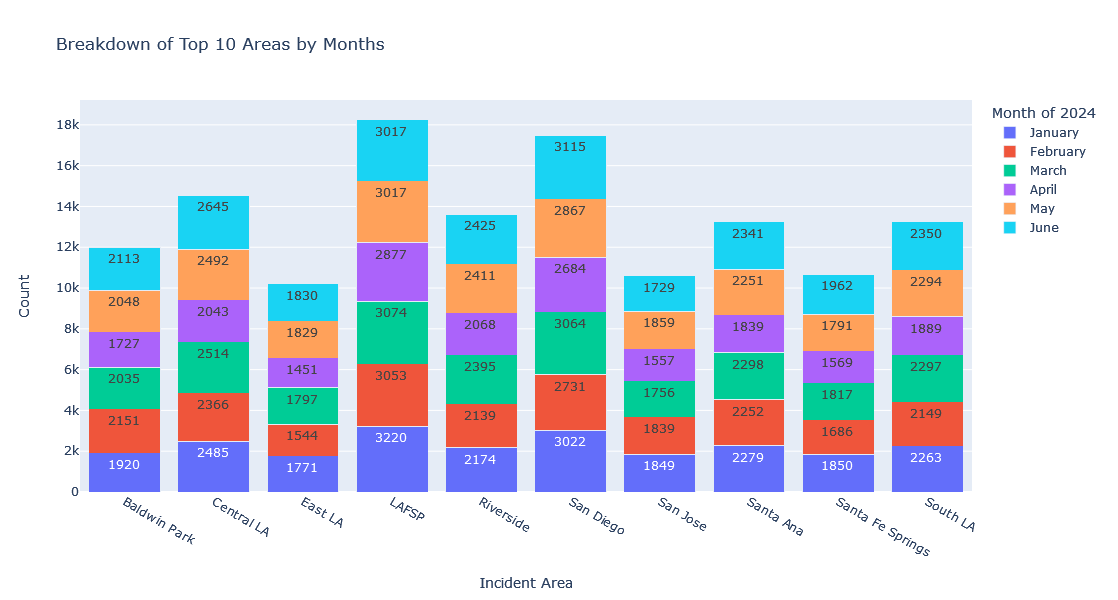

In [58]:
fig_incident = px.bar(df, x="Incident Area", 
                      y="Count", 
                      color="Month of 2024", 
                      barmode="stack", 
                      text="Count",  
                      width=1000, 
                      height=600,
                      title = "Breakdown of Top 10 Areas by Months" )
fig_incident.show()

PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)


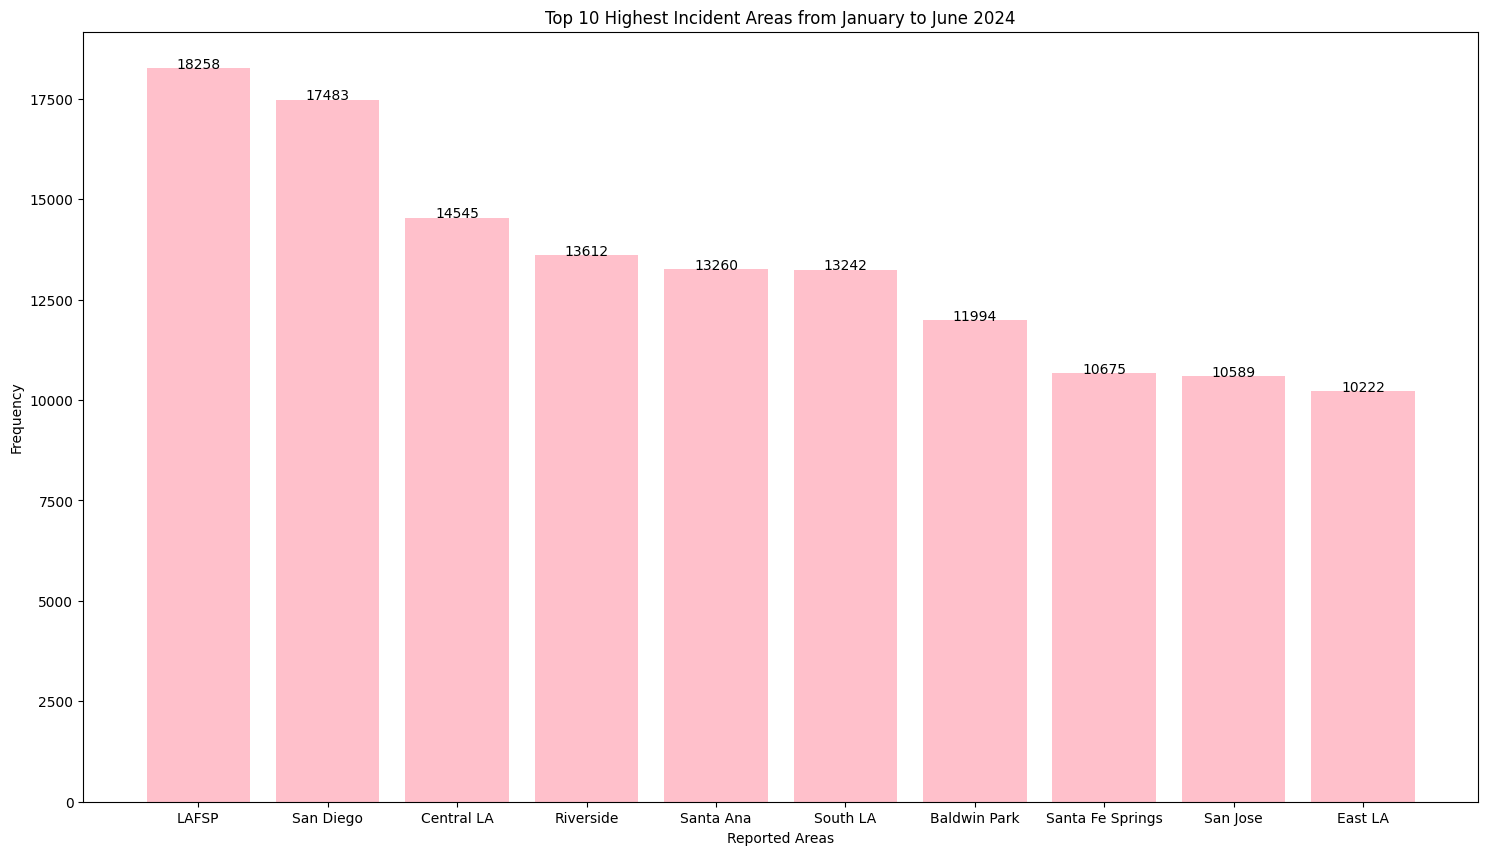

In [60]:
single_bar(log_area_df(2,7),"Top 10 Highest Incident Areas from January to June 2024")